In [1]:
import tensorflow                          # TensorFlow library for building deep learning models
print(tensorflow.__version__)             # Checking TensorFlow version

import numpy as np                         # For numerical computations
import matplotlib.pyplot as plt            # For data visualization
import pandas as pd                        # For data loading and preprocessing
import warnings                            # To suppress warnings
warnings.filterwarnings("ignore")         # Ignores unnecessary warnings for cleaner outpu

2.19.0


In [2]:
data = pd.read_csv("/content/aps_data.csv")
df = data.copy()

In [4]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [5]:
df.shape

(5000, 171)

In [6]:
print(df.isnull().sum())                   # Check missing values column-wise
print(df.dtypes)                           # Data types of each column
print(df.head())                           # Show top 5 rows

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64
class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object
  class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  ...  \
0   neg       6      0      0      0      0      0      0      0      0  ...   
1   neg      90      0      0     66      0      0      0      0      0  ...   
2   neg      30     na     16     14      0      0      0      0      0  ...   
3   neg     444     na     14     12      0      0      0      0      0  ...   
4   neg      82     na     12     10      0      0      0      0   1464  ...   

  ee_002 ee_003 ee_004 ee_005 ee_006 ee_007 ee_008 ee_009 ef_000 eg_000  
0     26      8     26     52      0      0      0      0      0      0  

In [7]:
for feature in [feature for feature in df.columns if feature not in ['class','int64']]:
    df[feature] = pd.to_numeric(df[feature], errors="coerce")  # Convert to numeric, invalid entries become NaN


In [8]:
print(df.dtypes)                           # Check updated data types
print(df.isnull().sum().sort_values(ascending=False))  # See which features have missing values

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object
br_000    4105
bq_000    4043
bp_000    3960
cr_000    3849
ab_000    3849
          ... 
cj_000      38
ci_000      38
bt_000      12
aa_000       0
class        0
Length: 171, dtype: int64


In [9]:
for feature in [feature for feature in df.columns if feature != 'class']:
    df[feature] = df[feature].fillna(df[feature].median())

In [10]:
X = df.drop("class", axis=1)               # Features (all except target)
y = df["class"]                             # Target variable (class label)

In [11]:
y = pd.get_dummies(y, drop_first=True)     # Converts 'pos/neg' to binary, drops first to avoid multicollinearity

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)  # 80% train, 20% test


In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()                      # Initialize Standard Scaler
X_train_scl = sc.fit_transform(X_train)    # Fit and transform training data (mean=0, std=1)
X_test_scl = sc.transform(X_test)          # Only transform test data using training mean & std


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [15]:
classifier = Sequential()                  # Sequential model: stack layers one by one

In [16]:
# 🔷 Input Layer + First Hidden Layer
classifier.add(Dense(units=10,                      # 10 neurons in first hidden layer
                     kernel_initializer='he_uniform', # Weight initialization suited for ReLU
                     activation='relu',              # Activation Function: ReLU
                     input_dim=170))                 # Number of input features = 170

In [17]:
# 🔷 Second Hidden Layer
classifier.add(Dense(units=10,                       # 10 neurons in second hidden layer
                     kernel_initializer='he_uniform',
                     activation='relu'))

In [18]:
# 🔷 Output Layer
classifier.add(Dense(units=1,                        # 1 neuron for binary classification output
                     kernel_initializer='glorot_uniform', # Xavier initializer suited for sigmoid
                     activation='sigmoid'))          # Sigmoid outputs probability (0 to 1)


In [19]:
# ✅ Compile the model
classifier.compile(optimizer='adam',                # Optimizer: Adam (adaptive learning)
                   loss='binary_crossentropy',      # Loss: Binary classification
                   metrics=['accuracy'])            # Metric to monitor: Accuracy



In [20]:
classifier.summary()                                 # Shows layer-wise summary of model


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         1,710 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,831 (7.15 KB)

 Trainable params: 1,831 (7.15 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# ✅ Model Training
model_history = classifier.fit(X_train_scl,          # Corrected input: train data
                               y_train,              # Labels
                               batch_size=10,        # Batch size: 10 samples per update
                               epochs=50,            # Train for 30 full passes over data
                               validation_split=0.25) # 25% of train data used as validation

Epoch 1/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8378 - loss: 0.4066 - val_accuracy: 0.9780 - val_loss: 0.0941
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9825 - loss: 0.0686 - val_accuracy: 0.9800 - val_loss: 0.0602
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9869 - loss: 0.0367 - val_accuracy: 0.9810 - val_loss: 0.0691
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9917 - loss: 0.0272 - val_accuracy: 0.9850 - val_loss: 0.0691
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9915 - loss: 0.0309 - val_accuracy: 0.9860 - val_loss: 0.0774
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9926 - loss: 0.0235 - val_accuracy: 0.9850 - val_loss: 0.0975
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9915 - loss: 0.0233 - val_accuracy: 0.9870 - val_loss: 0.1196
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9925 - loss: 0.0212 - val_accuracy: 0.

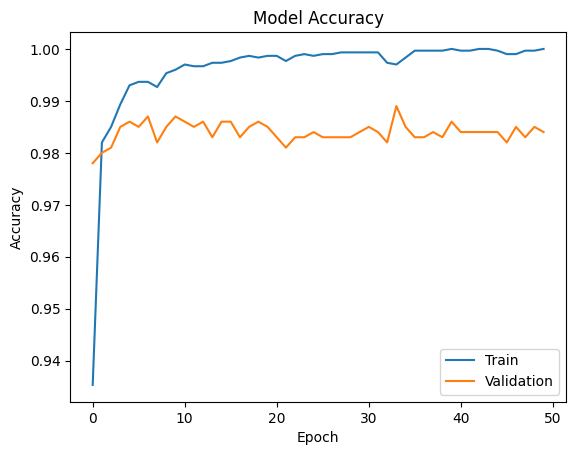

In [22]:
# ✅ Plot Training Accuracy & Loss
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

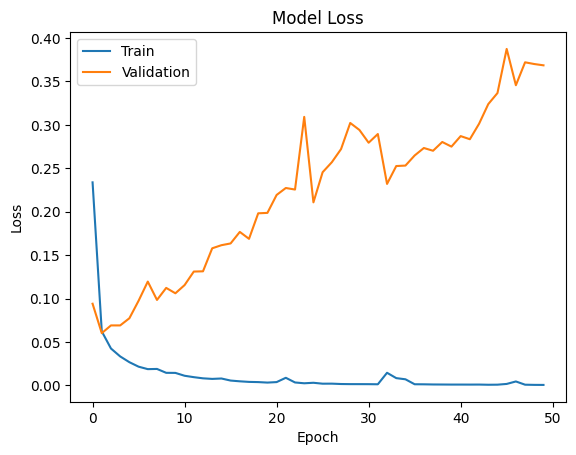

In [23]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [24]:
import time
import os
def saveModel_path(model_dir="/content/SAVED_MODELS/"):
  os.makedirs(model_dir, exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName)
  print(f"your model will be saved at the following location\n{model_path}")
  return model_path

In [31]:
# ✅ Predictions on Test Data
y_pred = classifier.predict(X_test_scl)             # Predict probabilities
y_pred1 = y_pred > 0.5                              # Convert to binary prediction using threshold 0.5

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [30]:
# ✅ Evaluate using Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred1))

[[978   5]
 [  9   8]]


In [32]:
# ✅ Save Trained Model
import time, os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    # Unique filename with timestamp
    model_path = os.path.join(model_dir, fileName)
    print(f"Model saved at: {model_path}")
    return model_path

classifier.save(saveModel_path())

Model saved at: SAVED_MODELS/Model_2026_01_30_14_45_36_.h5


In [33]:
# ✅ Hyperparameter Tuning using Keras Tuner
!pip install keras-tuner --upgrade
from kerastuner.tuners import RandomSearch

# 🔷 Define a model-building function for tuning
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=32,                       # First hidden layer with 32 neurons
                    kernel_initializer='he_uniform',
                    activation='relu',
                    input_dim=170))
    model.add(Dense(units=32, activation='relu'))  # Second hidden layer
    model.add(Dense(1, activation='sigmoid'))      # Output layer (binary)

    optimizer = hp.Choice("optimizer",              # Tuner will choose best optimizer
                          values=["adam", "sgd", "rmsprop", "adadelta"])
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.2 MB/s eta 0:00:00


In [34]:
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5,                # Try 5 different combinations
                     directory='project1',
                     project_name='aps-fault')

In [35]:
# 🔷 Perform search on training data
tuner.search(X_train, y_train,
             validation_data=(X_test, y_test),
             epochs=5)

Trial 4 Complete [00h 00m 03s]
val_accuracy: 0.9829999804496765

Best val_accuracy So Far: 0.9829999804496765
Total elapsed time: 00h 00m 35s


In [36]:
# 🔷 Get best model and hyperparameters
print(tuner.get_best_hyperparameters()[0].values)
mymodel = tuner.get_best_models(num_models=1)[0]
mymodel.summary()

{'optimizer': 'sgd'}


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         5,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,561 (25.63 KB)

 Trainable params: 6,561 (25.63 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# ✅ ADVANCED Hyperparameter Tuning (more layers + learning rate)
from tensorflow.keras import optimizers

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 5)):              # Tune number of hidden layers (2 to 5)
        model.add(Dense(units=hp.Int(f'units_{i}', 32, 512, step=32),  # Tune neurons in each layer
                        activation='relu'))

    model.add(Dense(1, activation='sigmoid'))                # Output layer

    model.compile(optimizer=optimizers.Adam(
                        hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), # Tune learning rate
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [38]:
# 🔷 New tuner instance with advanced tuning
tuner_second = RandomSearch(build_model,
                            objective='val_accuracy',
                            max_trials=5,
                            directory='project3',
                            project_name='aps-fault-sensor')

In [39]:
# 🔷 Run the tuner search
tuner_second.search(X_train, y_train,
                    epochs=5,
                    validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 10s]
val_accuracy: 0.9829999804496765

Best val_accuracy So Far: 0.9850000143051147
Total elapsed time: 00h 00m 48s


In [40]:
# 🔷 Get best model
classifier2 = tuner_second.get_best_models(num_models=1)[0]
classifier2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (32, 224)              │        38,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 352)              │        79,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 1)                │           353 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,857 (460.38 KB)

 Trainable params: 117,857 (460.38 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
MNIST Dataset ANN

In [ ]:
Overview

The MNIST dataset contains a total of 70,000 images of handwritten digits. These images are divided into two sets:

Training set: 60,000 images

Test set: 10,000 images

Each image is a grayscale image of size 28x28 pixels, and each pixel value is an integer between 0 and 255, representing the intensity of the pixel.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns


In [49]:
mnist=tf.keras.datasets.mnist

In [50]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [51]:
X_train_full.shape

(60000, 28, 28)

In [52]:
X_test.shape

(10000, 28, 28)

In [54]:
X_train_full[11000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         57, 141, 253,  57,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  57,
        224, 253, 251, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 255,
        253, 254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 168, 253,
        251, 253, 251,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 197, 255,
        253, 254,  84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251, 253,
        251, 196,  28,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 141, 253, 255,
        253,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 253, 251, 253,
        138,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 254, 253, 254,
         84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 168, 253, 251, 253,
         83,   0,   0,   0,   0, 169, 168,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 254, 253, 254,
         84,   0,   0,  29, 197, 254, 253, 254, 139,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 168, 253, 251, 196,
         28,   0, 114, 197, 251, 253, 251, 253, 251,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 254, 253, 169,
         57, 141, 253, 254, 253, 254, 253, 254, 253,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 168, 253, 251, 225,
        224, 253, 251, 253, 251, 253, 251, 253, 138,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 254, 253, 254,
        253, 254, 253, 254, 253, 254, 253, 254,  84,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 168, 253, 251, 253,
        251, 253, 251, 253, 251, 253, 251,  84,  28,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 198, 253, 254,
        253, 254, 253, 254, 253, 254,  84,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251, 253,
        251, 253, 251, 253, 251, 196,  28,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 254,
        253, 254, 253, 254, 196,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  56,  84,
         83, 139, 138,  84,  28,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

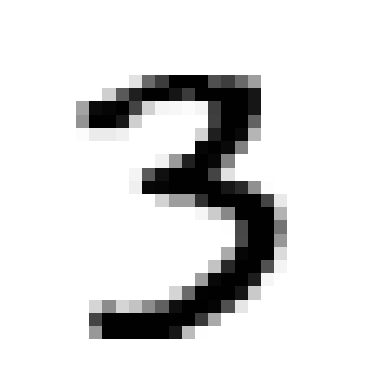

In [55]:
plt.imshow(X_train_full[10000],cmap='binary')
plt.axis("off")
plt.show()

<Axes: >

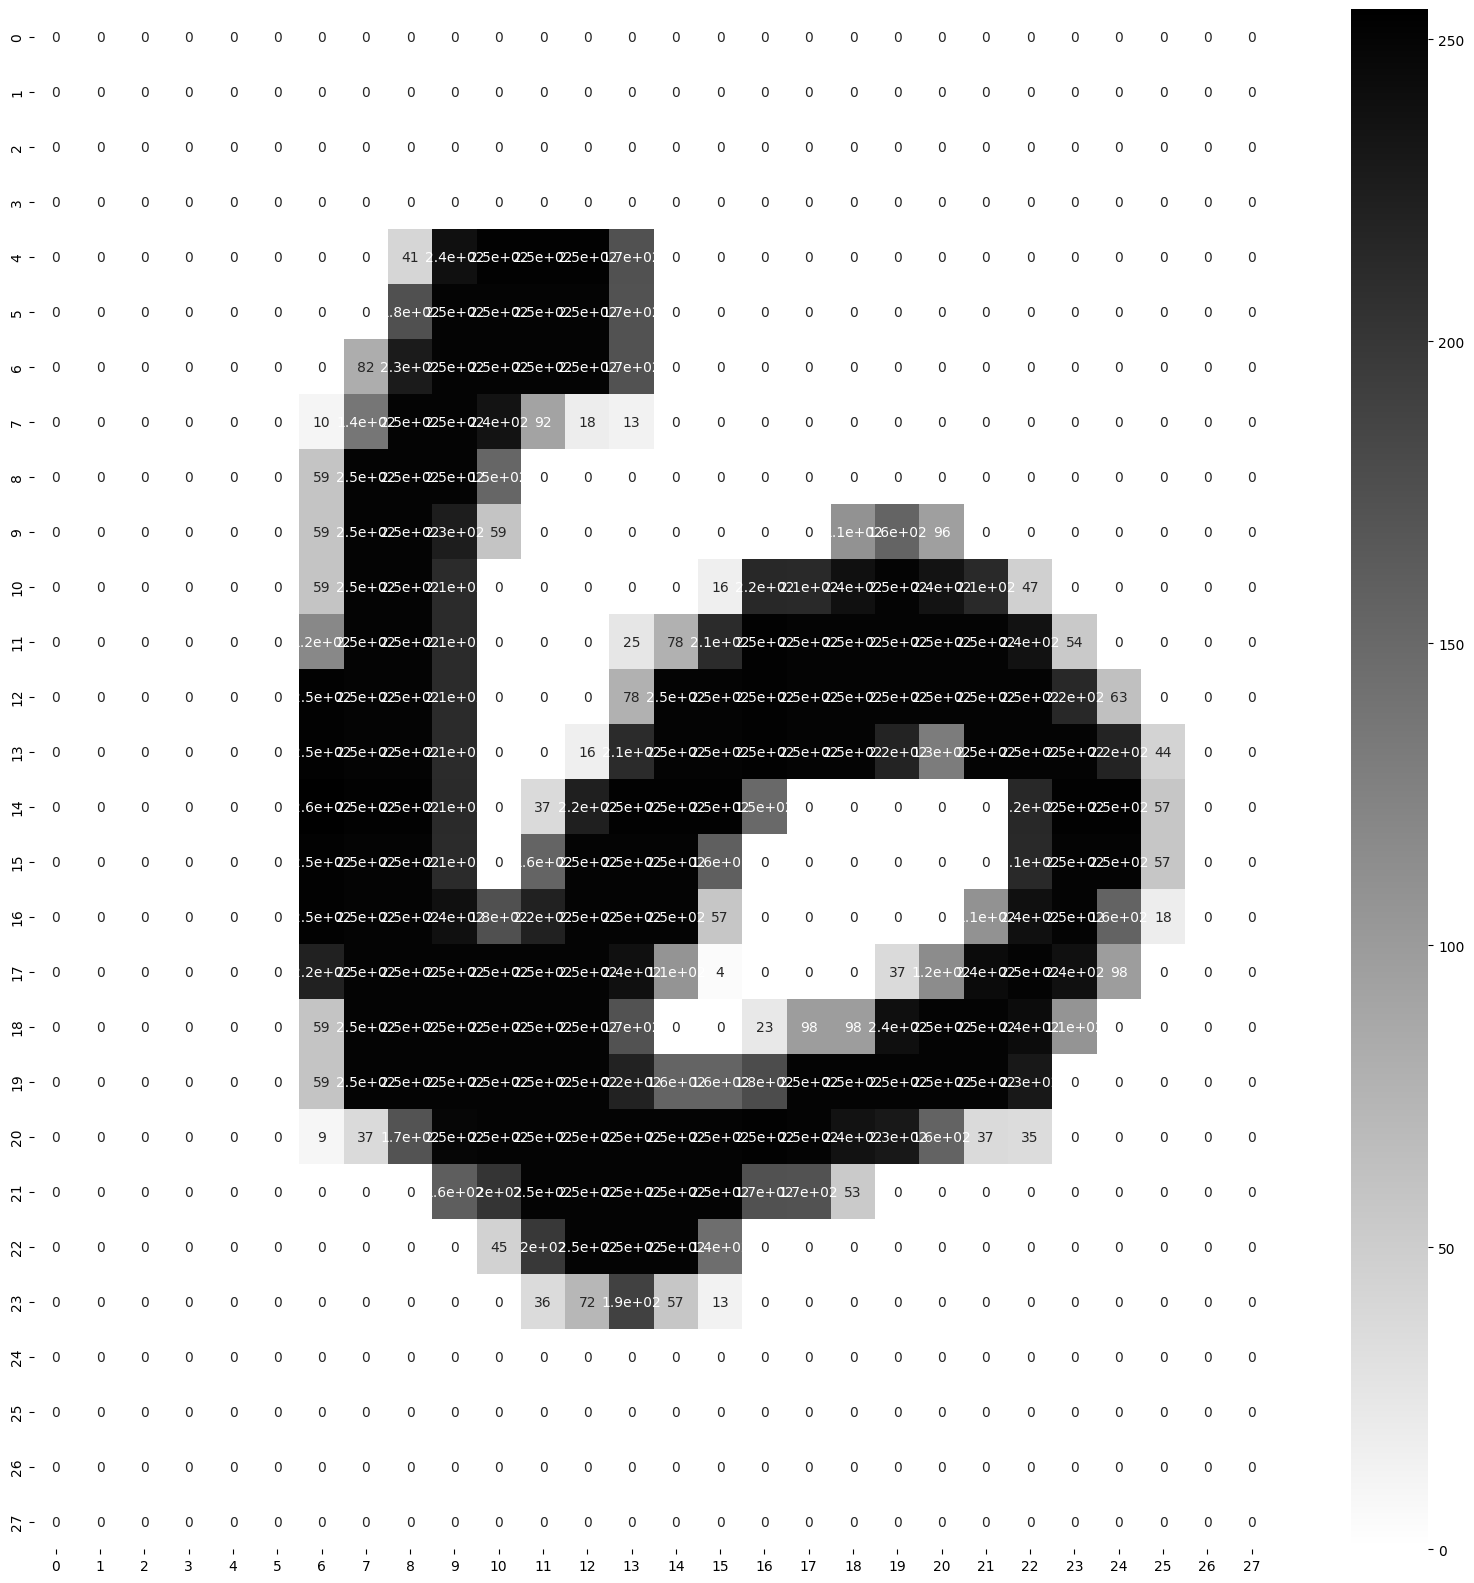

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_full[9000],annot=True,cmap="binary")

In [57]:
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
#unit scaling
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [58]:
# scale the test set as well
X_test = X_test / 255

In [59]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)
print(X_test.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)
(10000, 28, 28)


<Axes: >

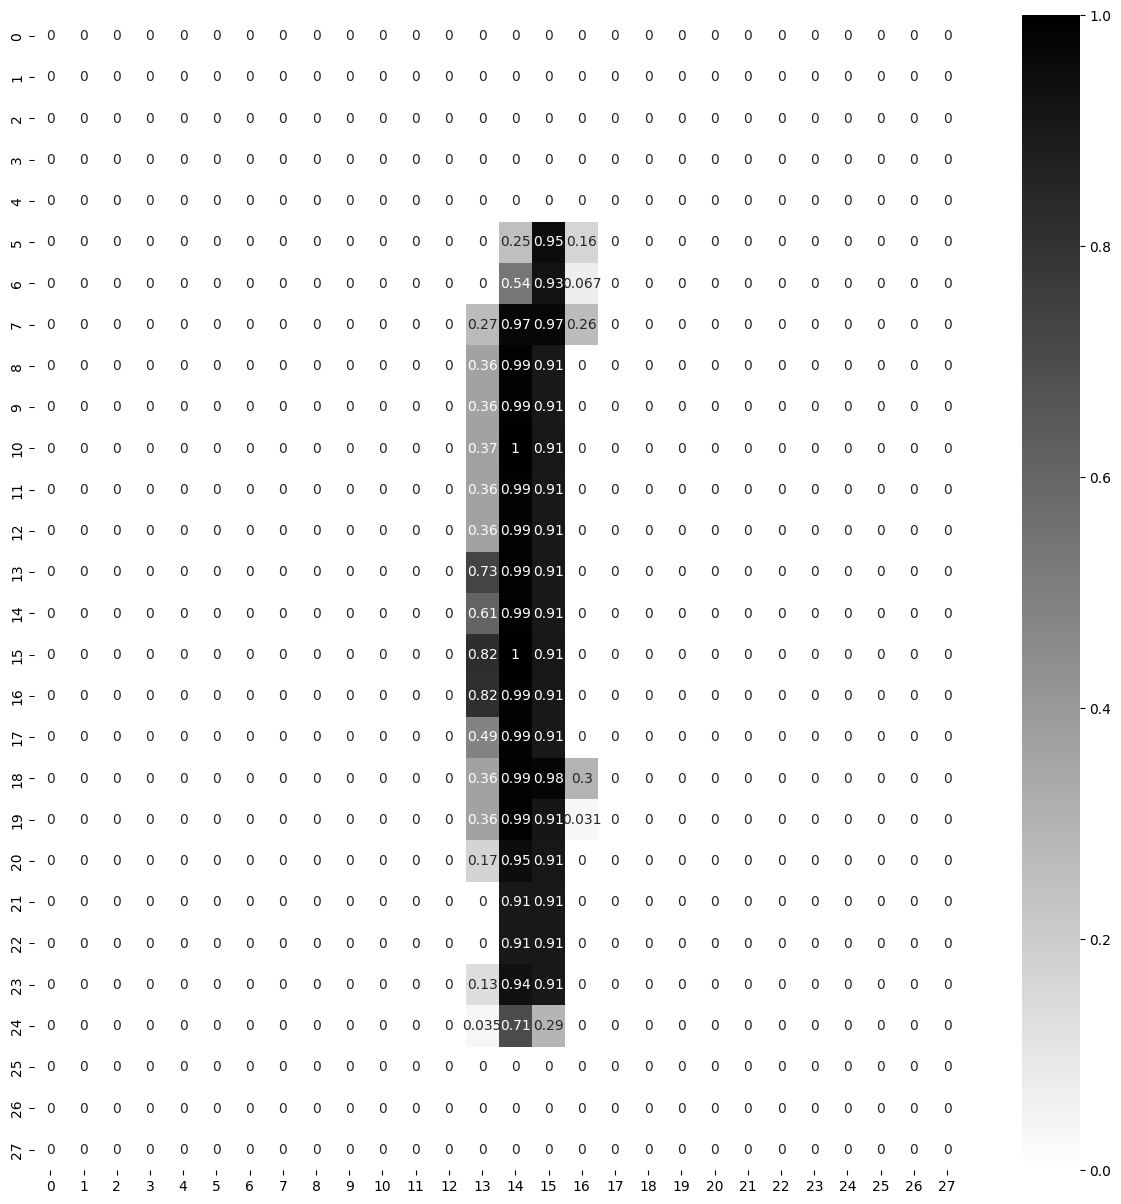

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[9000],annot=True,cmap="binary")

In [61]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
        tf.keras.layers.Dense(300,activation='relu',name="hiddenlayer1"),
        tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer2"),
        tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")]

In [62]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [63]:
model_clf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputlayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="ADAM"
METRICS=["accuracy"]

In [65]:
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [69]:
model_clf.layers[3].name

'outputlayer'

In [71]:
hidden1= model_clf.layers[1]

In [72]:
hidden1.get_weights()

[array([[-0.06991892,  0.01516656,  0.05301276, ...,  0.03894199,
          0.05039278, -0.01996378],
        [ 0.05631946, -0.00469744, -0.03437939, ..., -0.02463215,
          0.05752859, -0.01610232],
        [-0.03153588, -0.07103528, -0.01251398, ...,  0.03651782,
         -0.04665648,  0.00983872],
        ...,
        [ 0.05188276, -0.0310858 ,  0.00278339, ...,  0.01715574,
         -0.05877443, -0.0042778 ],
        [ 0.07306214,  0.0301976 ,  0.02214289, ...,  0.01054107,
          0.02982367, -0.01214262],
        [ 0.06379965, -0.06276204, -0.0166995 , ..., -0.06524784,
         -0.06237011,  0.05223085]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [73]:
# you can get the weights of the layers
weights,biases= hidden1.get_weights()

In [74]:
weights.shape

(784, 300)

In [75]:
biases.shape

(300,)

In [76]:
55000/32  #best size is 32

1718.75

In [77]:
EPOCHS=10
VALIDATION_SET=(X_valid,y_valid)
history= model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8919 - loss: 0.3655 - val_accuracy: 0.9672 - val_loss: 0.1093
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9714 - loss: 0.0889 - val_accuracy: 0.9722 - val_loss: 0.0832
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9806 - loss: 0.0571 - val_accuracy: 0.9764 - val_loss: 0.0828
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9867 - loss: 0.0399 - val_accuracy: 0.9780 - val_loss: 0.0790
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9894 - loss: 0.0318 - val_accuracy: 0.9784 - val_loss: 0.0780
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9925 - loss: 0.0222 - val_accuracy: 0.9792 - val_loss: 0.0880
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9930 - loss: 0.0209 - val_accuracy: 0.9784 - val_loss: 0.0883
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9934 - loss: 

In [78]:
import time
import os
def saveModel_path(model_dir="/content/SAVED_MODELS/"):
  os.makedirs(model_dir, exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName)
  print(f"your model will be saved at the following location\n{model_path}")
  return model_path

In [79]:
model_clf.save(saveModel_path())

your model will be saved at the following location
/content/SAVED_MODELS/Model_2026_01_30_15_37_22_.h5
